<a href="https://colab.research.google.com/github/SujayVivek/TradingStrategies/blob/main/AnalysisOnETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd;
import numpy as np;
import yfinance as yf;
import matplotlib.pyplot as plt;

**Make a list of Symbols**

In [3]:
symbols = ['VOO']

In [8]:
def fetchData(symbol):
  etf = yf.Ticker(symbol)
  return etf


In [9]:
def fetch_options_data(symbol):
  etf = yf.Ticker(symbol)
  try:
    expiration_dates = etf.options
    if expiration_dates:
      first_expiration_date = expiration_dates[0]
      options_chain = etf.option_chain(first_expiration_date)
      puts = options_chain.puts
      calls = options_chain.calls
      return len(puts), len(calls), first_expiration_date
    else:
      return None ,None, None
  except Exception as e:
    print(f"Error fetching options data for {symbol}: {e}")
    return None ,None, None


In [10]:
#For formatting stuff
def formatting_big_nos(asset):
  if asset>= 1e9:
    return f"{int(asset/1e9)}B";
  elif asset>= 1e6:
    return f"{int(asset/1e6)}M";

  else:
    return asset


In [11]:
def fetch_data(symbol):
  etf = yf.Ticker(symbol)
  info = etf.info
  puts_count, calls_count, expiration_date = fetch_options_data(symbol)
  latest_price = info.get('previousClose', np.nan)

  if puts_count is not None and calls_count is not None:
    trend = 'Bullish' if puts_count>calls_count else 'Bearish'
  else:
    trend = 'Unknown'

  one_year_return = round(info.get('ytdReturn', np.nan)*100, 2) if info.get('ytdReturn') is not None else "N/A"
  three_year_return = round(info.get('threeYearAverageReturn')*100, 2) if info.get('threeYearAverageReturn') is not None else "N/A"
  five_year_return = round(info.get('fiveYearAverageReturn')*100, 2) if info.get('fiveYearAverageReturn') is not None else "N/A"

  total_assets = info.get('totalAssets', np.nan) if info.get('totalAssets') is not None else "N/A"
  total_assets = formatting_big_nos(total_assets)

  return {
        'Symbol': symbol,
        'Name': info.get('longName', 'N/A'),
        'Latest Price': f"${latest_price}",
        '52W High': f"${round(info.get('fiftyTwoWeekHigh', np.nan), 2)}",
        '52W Low': f"${round(info.get('fiftyTwoWeekLow', np.nan), 2)}",
        '1 Year Return': one_year_return,
        '3 Year Return': three_year_return,
        '5 Year Return': five_year_return,
        'Total Assets': total_assets,
        'Dividend Yield': f"{round(info.get('yield', np.nan) * 100, 2)}%" if info.get('yield') is not None else "N/A",
        'Average Volume': info.get('averageVolume', 'N/A'),
        'Puts Count': puts_count,
        'Calls Count': calls_count,
        'Option Expire': expiration_date,
        'Trend': trend
    }

In [12]:
from flask import Flask, render_template_string

In [13]:
app = Flask('ETFsAnalysis')


In [15]:
data = fetch_data('VOO')
print(data)

{'Symbol': 'VOO', 'Name': 'Vanguard S&P 500 ETF', 'Latest Price': '$498.58', '52W High': '$500.15', '52W Low': '$375.95', '1 Year Return': 14.6, '3 Year Return': 10.13, '5 Year Return': 15.32, 'Total Assets': '1137B', 'Dividend Yield': '1.32%', 'Average Volume': 5148155, 'Puts Count': 79, 'Calls Count': 82, 'Option Expire': '2024-06-21', 'Trend': 'Bearish'}


In [16]:
df = yf.Ticker('VOO')

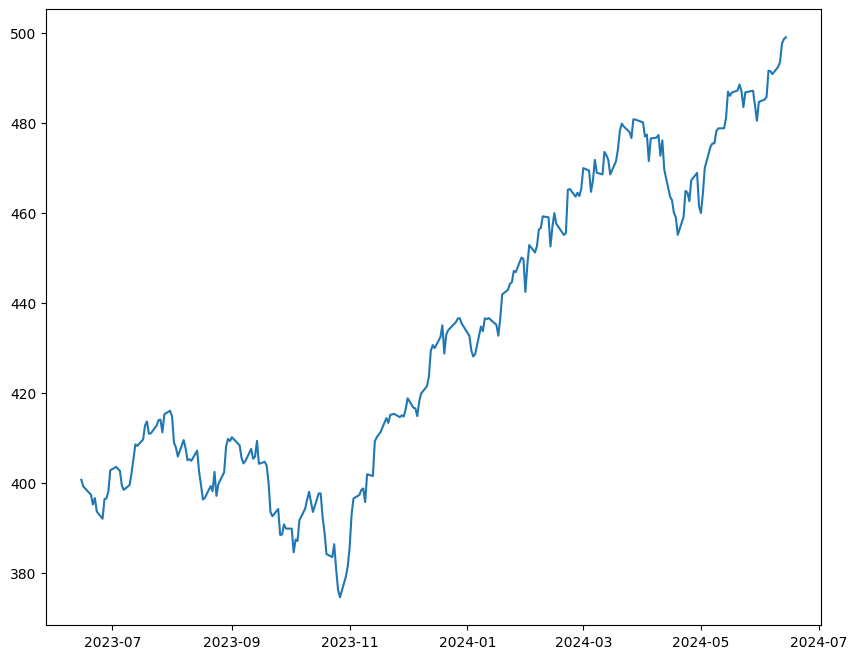

In [18]:
figure = plt.figure(figsize= (10,8))
plt.plot(df['Close'], label = 'VOO')

plt.show()


In [20]:
!pip install mplfinance
import mplfinance as mpf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [22]:
df = yf.download('VOO', start = '2023-01-01', end = '2024-06-16')

[*********************100%%**********************]  1 of 1 completed


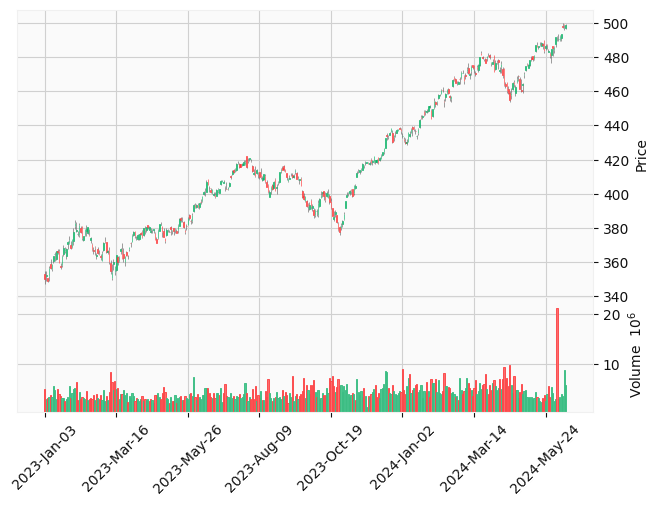

In [24]:

mpf.plot(df, type = 'candle', volume = True, style = 'yahoo')